In this notebook, I will attempt to make a primitive model of the effects of erosion on the coastline. I will employ a 2D array to represent this. We can prepopulate the array with a few rows just to illustrate the concept. A '1' will represent land, and a '0' will represent water.

In [86]:
import numpy as np
coast = [
    [0,0,0,0,0,0,0],
    [0,1,1,0,1,1,0],
    [0,1,1,0,1,1,0],
    [0,1,1,0,1,1,0],
    [0,1,1,0,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0]]

Next, we can make a function to perform a timestep. In this timestep, we will show the water eroding the non-landlocked elements in our coast. Computationally, we can subtract an arbitrary fraction from the FIRST non-zero element in each COLUMN. Note that the rectangular property of the 2D array is important for this; since each nested list has the same amount of elements, we can iterate by index down each column.

In [87]:
def timestep(coast):
    for row_idx in range(len(coast)): # loops to check every element
        for col_idx in range(len(coast[row_idx])): # in the 2d array.
            if coast[row_idx][col_idx] > 0: # if there is land, begin the coast checks               
                if row_idx != 0:
                    if coast[row_idx-1][col_idx] <= 0:
                        coast[row_idx][col_idx] -= 0.16
                if col_idx != 0:
                    if coast[row_idx][col_idx-1] <= 0:
                        coast[row_idx][col_idx] -= 0.06
                if col_idx != len(coast[0])-1:
                    if coast[row_idx][col_idx+1] <= 0:
                        coast[row_idx][col_idx] -= 0.06
                
                if coast[row_idx][col_idx] < 0:
                    coast[row_idx][col_idx] = 0
    
                
                
            

The iteration process looks a bit confusing (at least to me), but the algorithm can be described as follows:

Go down each column in the array, starting from the top left.
If the value is > 0, subtract some arbitrary decimal, stop iterating, and move to the next column.
Proceed this way until you have done every column.

In [88]:

np.sum(coast)

26

To better visualize this effect, we can make some plots. We will plot overlapping circles to represent a contiguous landmass, each one with the same radius at first. As we take timesteps, we will reduce the radius to reflect shrinking area of land.

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import numpy as np

(-2.0, 8.0)

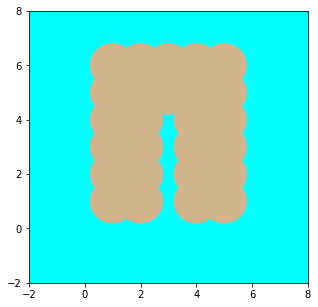

In [90]:
fig, ax = plt.subplots(1,figsize=(5,5))
points = {} # dictionary to keep track of patches by coordinates!
            # this only works because of the 2D array - no two circles
            # will ever have the same coordinates. hideous errors
            # would occur if not for this.
            
ax.set_facecolor('aqua')
            
for row in range(len(coast)):
    for col in range(len(coast[0])):
        p = mpatches.Circle((col, row), coast[row][col]*0.8, color="tan") # key = coords, val = patch object
        points[(row,col)] = p
        ax.add_patch(p)

plt.xlim([-2,8])
plt.ylim([-2,8])

In [91]:
def graphical_timestep(coast):
    timestep(coast)
    for row in range(len(coast)):
        for col in range(len(coast[0])):
            points[(row,col)].set_radius(coast[row][col]*0.8)

About to try an animation - this might be ugly

^it didn't work, so have this instead. Scroll fast!

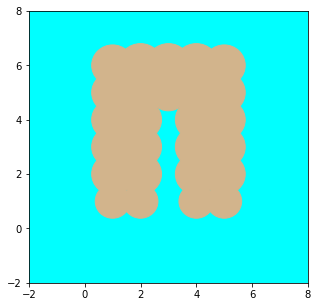

In [92]:
graphical_timestep(coast)
ax.figure

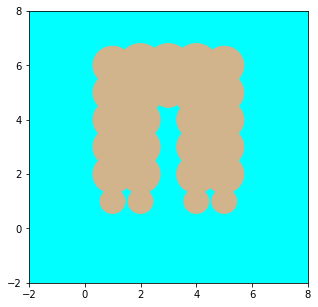

In [93]:
graphical_timestep(coast)
ax.figure

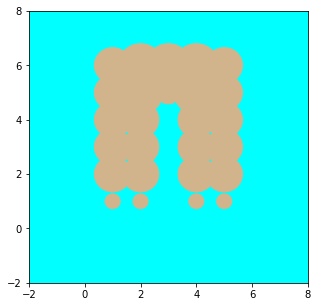

In [94]:
graphical_timestep(coast)
ax.figure

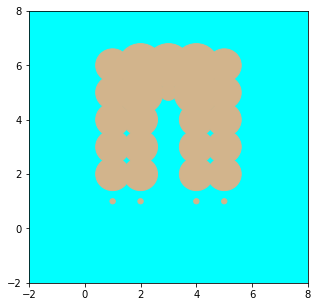

In [95]:
graphical_timestep(coast)
ax.figure

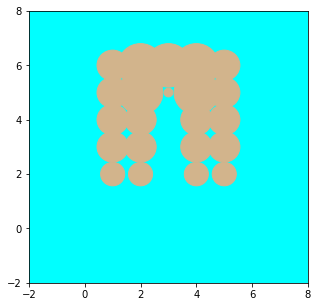

In [96]:
graphical_timestep(coast)
ax.figure

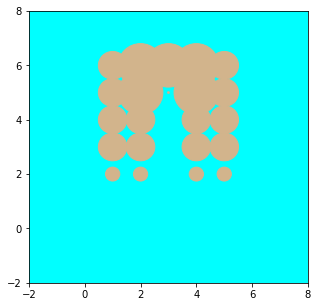

In [97]:
graphical_timestep(coast)
ax.figure

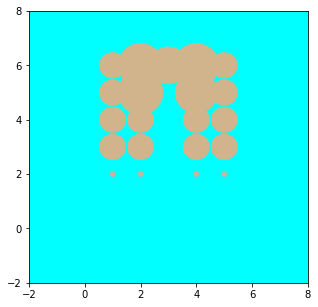

In [98]:
graphical_timestep(coast)
ax.figure

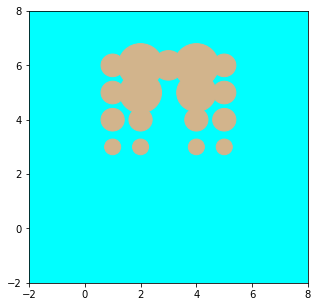

In [99]:
graphical_timestep(coast)
ax.figure

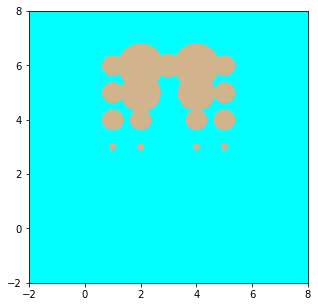

In [100]:
graphical_timestep(coast)
ax.figure

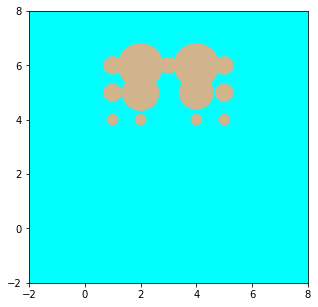

In [101]:
graphical_timestep(coast)
ax.figure

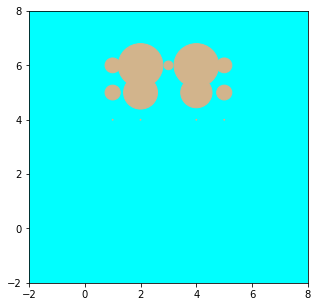

In [102]:
graphical_timestep(coast)
ax.figure

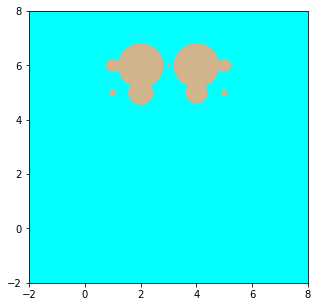

In [103]:
graphical_timestep(coast)
ax.figure

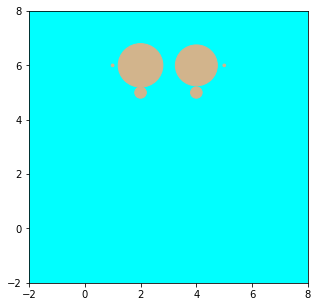

In [104]:
graphical_timestep(coast)
ax.figure

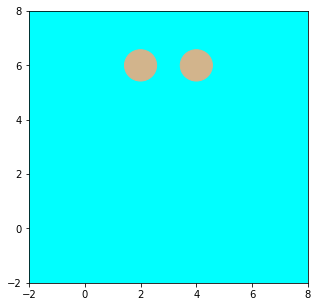

In [105]:
graphical_timestep(coast)
ax.figure

...and so on. Now, we can implement tree planting as a means to slow coastal erosion! We will create another 2D array of the same shape as our coast array, with "True" indicating the presence of a tree at certain coordinates and "False indicating the absence of one.

In [106]:
treemap = np.zeros((len(coast), len(coast[0])), dtype=bool)
treemap

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

As a proof of concept, we will randomly populate treemap. Each cell will have a ~25% chance of containing a tree.

In [131]:
import random
for row_idx in range(len(treemap)): # loops to check every element
    for col_idx in range(len(treemap[row_idx])): # in the 2d array.
        r = random.random()
        if r >= 0.75:
            treemap[row_idx][col_idx] = True
treemap

array([[ True, False, False,  True, False, False, False],
       [False,  True, False,  True,  True, False, False],
       [False,  True, False,  True, False,  True,  True],
       [ True,  True, False,  True,  True,  True, False],
       [ True, False, False, False,  True,  True, False],
       [False, False, False, False,  True,  True, False],
       [ True, False, False, False, False,  True,  True]])

We can now reinitialize our coast, and simulate erosion again. 

In [132]:
coast = [
    [0,0,0,0,0,0,0],
    [0,1,1,0,1,1,0],
    [0,1,1,0,1,1,0],
    [0,1,1,0,1,1,0],
    [0,1,1,0,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0]]

We must also amend our timestep algorithm to reduce erosion rates on cells with trees.If there is a tree on a land-cell, it erodes more slowly. If there is a tree between a land-cell and a water-cell, it also erodes more slowly.

In [133]:
def timestep(coast):
    for row_idx in range(len(coast)): # loops to check every element
        for col_idx in range(len(coast[row_idx])): # in the 2d array.
            if coast[row_idx][col_idx] > 0: # if there is land, begin the coast checks               
                if row_idx != 0:
                    if coast[row_idx-1][col_idx] <= 0:
                        if treemap[row_idx-1][col_idx]:
                            coast[row_idx][col_idx] -= 0.06
                        else:
                            coast[row_idx][col_idx] -= 0.16
                if col_idx != 0:
                    if coast[row_idx][col_idx-1] <= 0:
                        if treemap[row_idx][col_idx-1]:
                            coast[row_idx][col_idx] -= 0.02
                        else:
                            coast[row_idx][col_idx] -= 0.06
                if col_idx != len(coast[0])-1:
                    if coast[row_idx][col_idx+1] <= 0:
                        if treemap[row_idx][col_idx+1]:
                            coast[row_idx][col_idx] -= 0.02
                        else:
                            coast[row_idx][col_idx] -= 0.06
                
                if coast[row_idx][col_idx] < 0:  # fixes over-subtraction
                    coast[row_idx][col_idx] = 0

We can now resimulate our erosion, adding markers for the presence of trees.

(-2.0, 8.0)

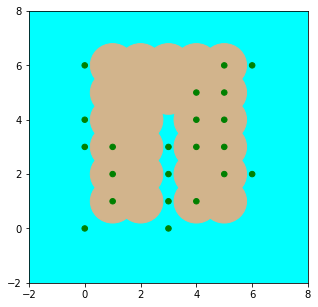

In [134]:
fig, ax = plt.subplots(1,figsize=(5,5))
points = {} # dictionary to keep track of patches by coordinates!
            # this only works because of the 2D array - no two circles
            # will ever have the same coordinates. hideous errors
            # would occur if not for this.
            
ax.set_facecolor('aqua')
            
for row in range(len(coast)):
    for col in range(len(coast[0])):
        p = mpatches.Circle((col, row), coast[row][col]*0.8, color="tan") # key = coords, val = patch object
        points[(row,col)] = p
        ax.add_patch(p)

for row in range(len(treemap)):
    for col in range(len(treemap[0])):
        if treemap[row][col]:
            t = mpatches.Circle((col, row), 0.1, color="green")
            ax.add_patch(t)


plt.xlim([-2,8])
plt.ylim([-2,8])

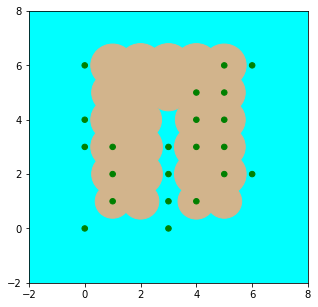

In [135]:
graphical_timestep(coast)
ax.figure

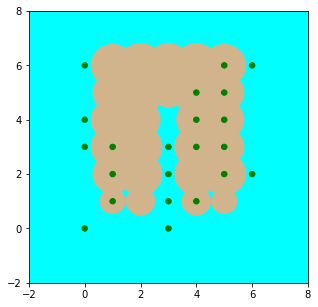

In [136]:
graphical_timestep(coast)
ax.figure

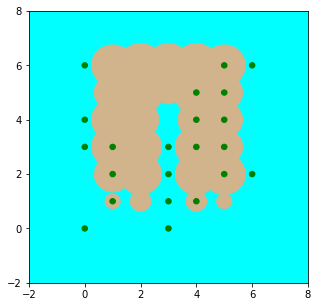

In [137]:
graphical_timestep(coast)
ax.figure

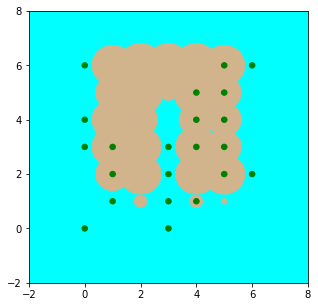

In [138]:
graphical_timestep(coast)
ax.figure

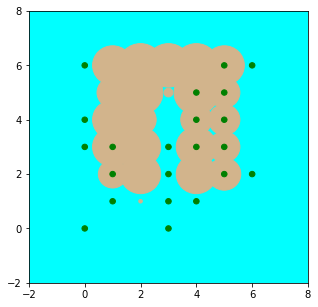

In [139]:
graphical_timestep(coast)
ax.figure

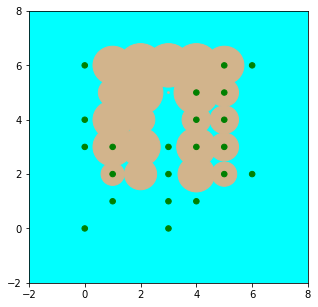

In [140]:
graphical_timestep(coast)
ax.figure

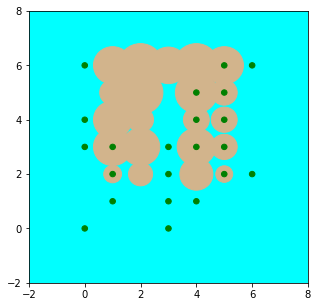

In [141]:
graphical_timestep(coast)
ax.figure

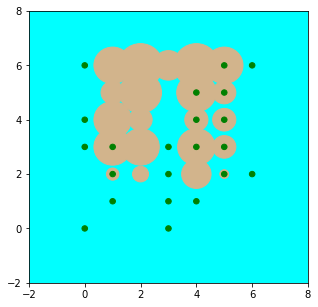

In [142]:
graphical_timestep(coast)
ax.figure

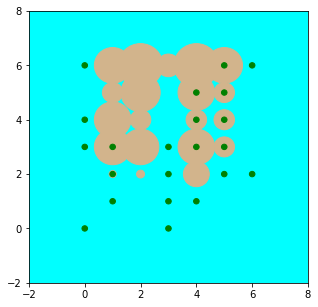

In [143]:
graphical_timestep(coast)
ax.figure

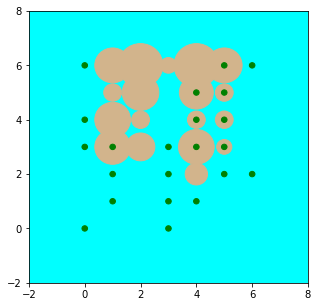

In [144]:
graphical_timestep(coast)
ax.figure

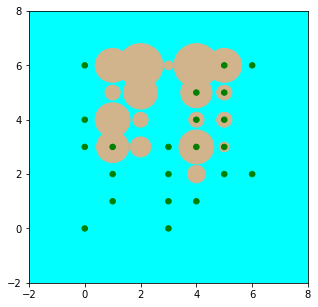

In [145]:
graphical_timestep(coast)
ax.figure

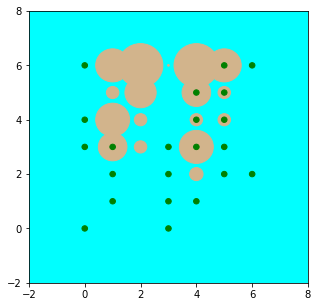

In [146]:
graphical_timestep(coast)
ax.figure

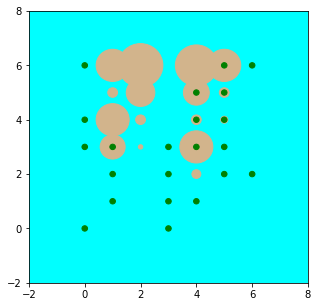

In [147]:
graphical_timestep(coast)
ax.figure

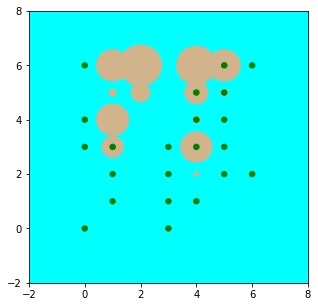

In [148]:
graphical_timestep(coast)
ax.figure

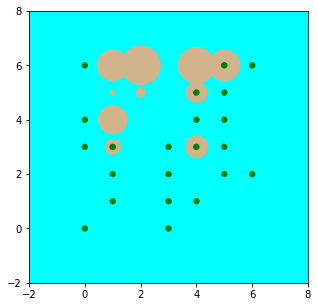

In [149]:
graphical_timestep(coast)
ax.figure

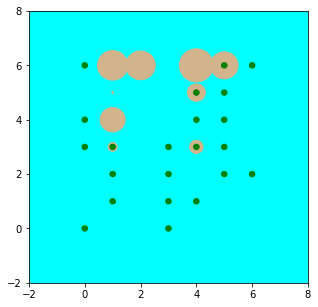

In [150]:
graphical_timestep(coast)
ax.figure

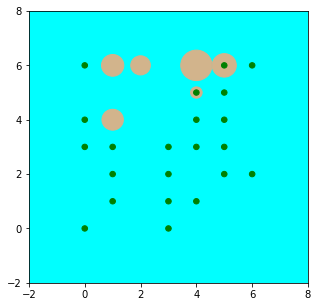

In [151]:
graphical_timestep(coast)
ax.figure

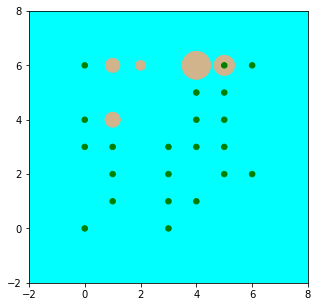

In [152]:
graphical_timestep(coast)
ax.figure

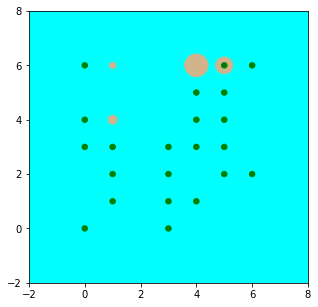

In [153]:
graphical_timestep(coast)
ax.figure

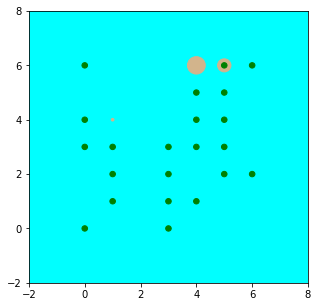

In [154]:
graphical_timestep(coast)
ax.figure